## 유닛 6 기온 데이터를 다양하게 시각화하기
#### 서울 데이터는 p29에 받는 방법이 나옵니다

In [5]:
# p78 히스토그램
import numpy as np
import matplotlib.pyplot as plt
# x = [1,2,3,4,5,4,3,4,5,10,4,5,4,5]
x = np.random.randint(1,10, size = (10))
plt.hist(x)
plt.plot(x)

In [17]:
# 천번의 주사위 던지기 기록을 생성합니다.
x = np.random.randint(low=1, high=7, size=(1000))

(array([174., 145., 158., 175., 168., 180.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

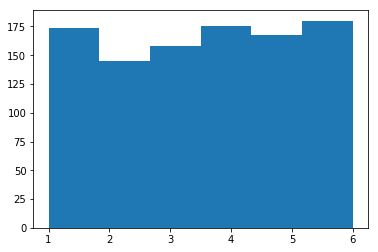

In [18]:
plt.hist(x, bins =6) # 6개의 막대로 표현

In [4]:
import csv

In [36]:
f = open('seoul.csv') # p29
f

<_io.TextIOWrapper name='seoul.csv' mode='r' encoding='cp949'>

In [37]:
data = csv.reader(f) # p83
date = next(data)

In [23]:
date[0].split('-')[1] == '08'

False

- 지난 100년간 6월 19일의 최고기온의 히스토그램을 그리세요
- p85~86 처럼 8월과 1월의 최고기온 히스토그램을 동시에 그리세요

In [45]:
f = open('seoul.csv') # p29
data = csv.reader(f) # p83
next(data)
result_01 = [] # 비어있는 리스트를 준비
result_08 = []

# 누락된 기온 ''
for row in data: # 한줄 한줄 꺼낸다
    if row[-1] != '': # 누락되어 있지 않으면
        date = row[0].split('-')
        if date[1] == '01':
            result_01.append(float(row[-1])) # 최고기온을 실수로 변환해서 저장
        elif date[1] == '08':
            result_08.append(float(row[-1])) # 최고기온을 실수로 변환해서 저장

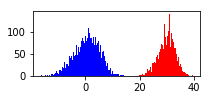

In [46]:
plt.figure(figsize=(3,1.2))
n = plt.hist(result_01, bins = 100, color='b')
n = plt.hist(result_08, bins = 100, color='r')

In [48]:
f = open('seoul.csv') # p29
data = csv.reader(f) # p83
next(data)

rows = []
for row in data:
    rows.append(row)
len(rows)

40365

상자 그림(box plot) p86

In [69]:
x = np.array([1,2,3,4, 10,11,12, 30, -10, -20])
np.mean(x), np.median(x)

(4.3, 3.5)

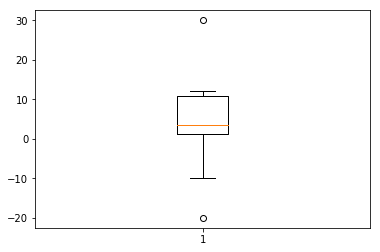

In [70]:
n = plt.boxplot(x) # 데이터를 정규분포로 표현했을 때 그 범위를 벗어나면 이상치

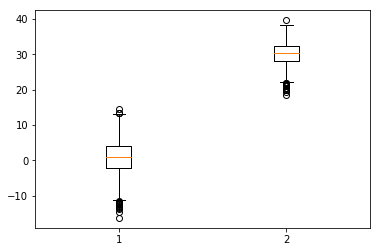

In [84]:
n = plt.boxplot([result_01,result_08])
#n08 = plt.boxplot(result_08)

1~12월의 최고기온을 박스 그림으로 표현합니다. p91~92

In [1]:
import pandas as pd
data = pd.read_csv('seoul.csv', encoding= 'cp949')
data = data.dropna() # 누락된 데이터 행 버리기
data.head() # 상위 5건

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [2]:
month = []
for i in range(12):
    month.append([])
month

[[], [], [], [], [], [], [], [], [], [], [], []]

In [6]:
x = np.array(data)
x.shape, x[0]

((39607, 5), array(['1907-10-01', 108, 13.5, 7.9, 20.7], dtype=object))

In [7]:
sum(x[:,-1])

661885.8999999912

In [8]:
for i in range(len(x)):
    row = x[i]
    date = row[0]
    high = row[-1]
    mon = date.split('-')[1]
    
    # 1월은 0번째 위치에 저장해야 하므로 -1
    month[int(mon)-1].append(high)
    #print(date, mon, high)

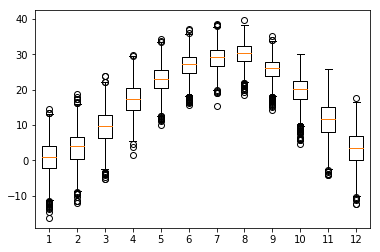

In [9]:
m = plt.boxplot(month)